In [544]:
pwd

'C:\\Users\\Ginni\\Sales'

In [545]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

In [546]:
Train = pd.read_csv('./Sales.csv')

In [547]:
Train.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350


In [548]:
Train.shape

(8523, 12)

In [549]:
Train['Item_Identifier'].value_counts()

FDG33    10
FDW13    10
FDD38     9
FDU12     9
DRE49     9
FDQ40     9
NCF42     9
NCL31     9
FDW26     9
NCQ06     9
FDX20     9
FDO19     9
FDV60     9
FDX04     9
FDV38     9
NCB18     9
NCI54     9
FDT07     9
NCJ30     9
FDW49     9
FDG09     9
FDF52     9
FDP25     9
FDF56     9
NCY18     9
FDX31     9
DRN47     9
FDR59     8
FDK20     8
FDY47     8
         ..
FDA48     2
FDD22     2
FDT33     2
FDF38     2
NCV18     2
NCW05     2
FDZ50     2
FDM16     2
NCX53     2
DRG25     2
NCM42     2
FDU43     2
FDM38     2
DRI59     2
NCW30     2
NCG19     2
FDB10     2
FDH22     2
FDR57     2
FDD48     2
FDE38     2
FDO33     1
FDE52     1
FDT35     1
FDN52     1
FDY43     1
FDQ60     1
FDC23     1
FDK57     1
DRF48     1
Name: Item_Identifier, Length: 1559, dtype: int64

In [550]:
df = Train.copy()

In [551]:
df.isnull().any()

Item_Identifier              False
Item_Weight                   True
Item_Fat_Content             False
Item_Visibility              False
Item_Type                    False
Item_MRP                     False
Outlet_Identifier            False
Outlet_Establishment_Year    False
Outlet_Size                   True
Outlet_Location_Type         False
Outlet_Type                  False
Item_Outlet_Sales            False
dtype: bool

In [552]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

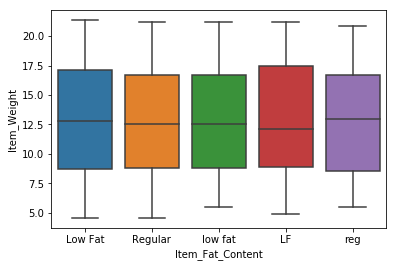

In [553]:
import seaborn as sns
sns.boxplot(data= df,x='Item_Fat_Content',y='Item_Weight')

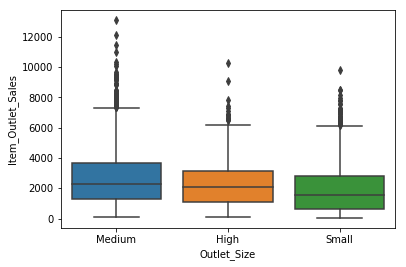

In [554]:
sns.boxplot(data= df,x='Outlet_Size',y='Item_Outlet_Sales')

In [555]:
Avg_weight =df[['Item_Identifier','Item_Weight']].groupby('Item_Identifier').mean()


In [556]:
df['Item_Weight'].describe()

count    7060.000000
mean       12.857645
std         4.643456
min         4.555000
25%         8.773750
50%        12.600000
75%        16.850000
max        21.350000
Name: Item_Weight, dtype: float64

In [557]:
df['Item_Weight'].fillna(df['Item_Weight'].mean(),inplace=True)

In [558]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

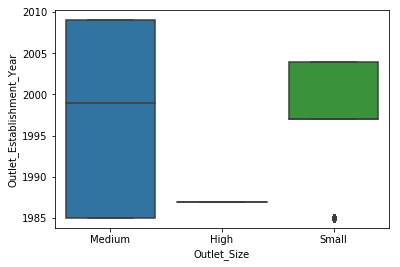

In [559]:
sns.boxplot(data= df,x='Outlet_Size',y='Outlet_Establishment_Year')

In [560]:
df[['Outlet_Establishment_Year','Outlet_Size']].groupby('Outlet_Size').mean()

,Outlet_Establishment_Year
Outlet_Size,
High,1987.000000
Medium,1997.635875
Small,1997.072864


In [561]:
sales_by_outlet = df[['Outlet_Identifier','Item_Outlet_Sales']].groupby('Outlet_Identifier').mean()

In [531]:
sales_by_outlet

,Item_Outlet_Sales
Outlet_Identifier,
OUT010,339.351662
OUT013,2298.995256
OUT017,2340.675263
OUT018,1995.498739
OUT019,340.329723
OUT027,3694.038558
OUT035,2438.841866
OUT045,2192.384798
OUT046,2277.844267


In [568]:
df['Outlet_Identifier'].value_counts()    

OUT027    935
OUT013    932
OUT035    930
OUT046    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

In [570]:
df[['Outlet_Identifier','Outlet_Size']].groupby('Outlet_Identifier').count()

,Outlet_Size
Outlet_Identifier,
OUT010,0
OUT013,932
OUT017,0
OUT018,928
OUT019,528
OUT027,935
OUT035,930
OUT045,0
OUT046,930


In [571]:
df[['Outlet_Identifier','Outlet_Type']].groupby('Outlet_Identifier').count()

,Outlet_Type
Outlet_Identifier,
OUT010,555
OUT013,932
OUT017,926
OUT018,928
OUT019,528
OUT027,935
OUT035,930
OUT045,929
OUT046,930


In [569]:
df['Outlet_Size'].value_counts()    

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [572]:
df['Outlet_Type'].value_counts()    

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

In [529]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [69]:
df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0],inplace=True)

In [70]:
df.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [255]:
var_mod = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    df[i] = le.fit_transform(df[i])
print(df.dtypes)

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object


In [256]:
def plot_dataframe(df, y_label):  
    color='coral'
    fig = plt.gcf()
    fig.set_size_inches(20, 12)
    plt.ylabel(y_label)

    ax = df.correlation.plot(linewidth=3.3, color=color)
    ax.set_xticks(df.index)
    ax.set_xticklabels(df.attributes, rotation=75) 
    plt.grid(True)
    plt.show()

In [257]:
cols= ['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP','Outlet_Identifier',
    'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

col= ['Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Item_MRP',
    'Outlet_Establishment_Year','Outlet_Size','Outlet_Location_Type','Outlet_Type']

correlations = [df['Item_Outlet_Sales'].corr(df[f]) for f in col]

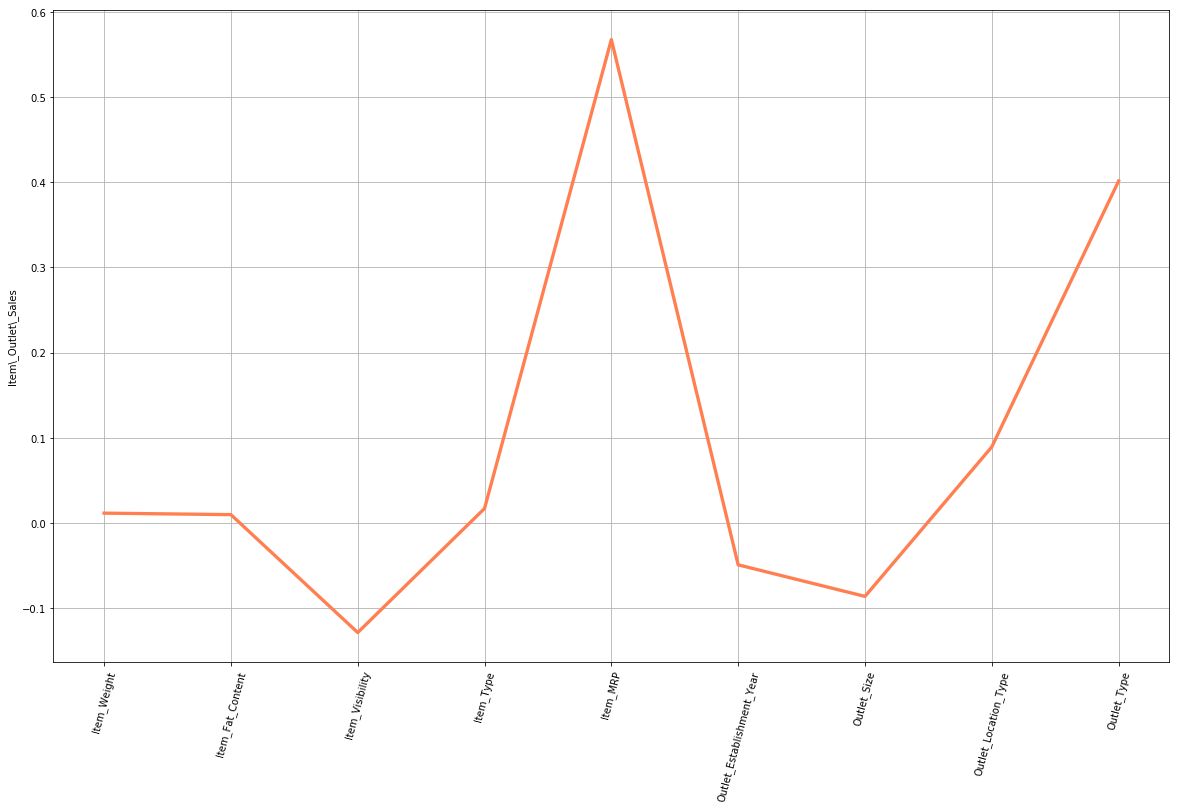

In [258]:
df_plot = pd.DataFrame({'attributes':col,'correlation':correlations})
plot_dataframe(df_plot,'Item\_Outlet\_Sales')

In [259]:
X = df[cols]
y = df[['Item_Outlet_Sales']]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

In [482]:
predictors = ['Item_MRP','Outlet_Type','Outlet_Location_Type','Item_Weight','Item_Fat_Content']
X_new = X_train[predictors]
y_new = y_train['Item_Outlet_Sales']

In [483]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_absolute_error

def get_mae(max_leaf_nodes, predictors_train, predictors_val, targ_train, targ_val):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(predictors_train, targ_train)
    preds_val = model.predict(predictors_val)
    mae = mean_absolute_error(targ_val, preds_val)
    return(mae)

In [484]:
mae_5 = get_mae(5,X_new,X_test[predictors],y_new,y_test['Item_Outlet_Sales'])
mae_5

912.5785825719098

In [485]:
mae_10 = get_mae(10,X_new,X_test[predictors],y_new,y_test['Item_Outlet_Sales'])
mae_10

764.7235003988505

In [486]:
mae_18 = get_mae(18,X_new,X_test[predictors],y_new,y_test['Item_Outlet_Sales'])
mae_18

752.1629032771481

In [487]:
from sklearn.ensemble import RandomForestRegressor

In [488]:
forest_model = RandomForestRegressor()
forest_model.fit(X_new,y_new)
forest_predict = forest_model.predict(X_test[predictors])
mae_forest = mean_absolute_error(y_test['Item_Outlet_Sales'],forest_predict)
mae_forest

843.7605931623651

In [489]:
from math import sqrt
def rmse(predictions,targets):
    return np.sqrt(((predictions -targets)**2).mean())

In [490]:
rmse(forest_predict,y_test['Item_Outlet_Sales'])

1204.746798452496

In [491]:
model = DecisionTreeRegressor(max_leaf_nodes=18, random_state=0)
model.fit(X_new, y_new)
model_predict = model.predict(X_test[predictors])

In [492]:
featimp = pd.Series(forest_model.feature_importances_, index=predictors).sort_values(ascending=False)
print(featimp)

Item_MRP                0.568862
Outlet_Type             0.274538
Item_Weight             0.104889
Item_Fat_Content        0.027803
Outlet_Location_Type    0.023908
dtype: float64


In [493]:
featimp = pd.Series(model.feature_importances_, index=predictors).sort_values(ascending=False)
print(featimp)

Item_MRP                0.552392
Outlet_Type             0.447608
Item_Fat_Content        0.000000
Item_Weight             0.000000
Outlet_Location_Type    0.000000
dtype: float64


In [494]:
rmse(model_predict,y_test['Item_Outlet_Sales'])

1071.880658217589

In [495]:
test = pd.read_csv('./Test_Sales.csv')

In [496]:
test.shape

(5681, 11)

In [497]:
test.apply(lambda x: sum(x.isnull()),axis=0)

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [498]:
test['Item_Weight'].describe()

count    4705.000000
mean       12.695633
std         4.664849
min         4.555000
25%         8.645000
50%        12.500000
75%        16.700000
max        21.350000
Name: Item_Weight, dtype: float64

In [499]:
test['Item_Weight'].fillna(test['Item_Weight'].mean(),inplace=True)

In [500]:
test['Outlet_Size'].fillna(test['Outlet_Size'].mode()[0],inplace=True)

In [501]:
var_mod = ['Item_Fat_Content','Item_Type','Outlet_Size','Outlet_Location_Type','Outlet_Type']
le = LabelEncoder()
for i in var_mod:
    test[i] = le.fit_transform(test[i])
print(df.dtypes)

Item_Identifier                int32
Item_Weight                  float64
Item_Fat_Content               int32
Item_Visibility              float64
Item_Type                      int32
Item_MRP                     float64
Outlet_Identifier              int32
Outlet_Establishment_Year      int64
Outlet_Size                    int32
Outlet_Location_Type           int32
Outlet_Type                    int32
Item_Outlet_Sales            float64
dtype: object


In [502]:
predictions = model.predict(test[predictors])

In [503]:
submission_sales = pd.DataFrame({'Item_Identifier':test.Item_Identifier,'Outlet_Identifier':test.Outlet_Identifier,
                                 'Item_Outlet_Sales':predictions})

In [504]:
submission_sales.head()

,Item_Identifier,Item_Outlet_Sales,Outlet_Identifier
0,FDW58,1471.947002,OUT049
1,FDW14,1471.947002,OUT017
2,NCN55,472.183041,OUT010
3,FDQ58,2509.155620,OUT017
4,FDY38,6317.000953,OUT027


In [468]:
submission_sales.to_csv('big_mart_sales.csv',index=False)